In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [5]:
url = "https://www.swiggy.com/hyderabad"
page = requests.get(url)
soup = BeautifulSoup(page.text)
page

<Response [200]>

In [6]:
base_url = "https://www.swiggy.com"
links = []
for i in soup.find_all("div",attrs ={'class':"_2Y-lS" }):
    for link in i.find_all('a',href = True ):
        links.append(base_url+link['href'])
        
         
types_of_links = links[3:]
types_of_links

['https://www.swiggy.com/hyderabad/biryani-collection',
 'https://www.swiggy.com/hyderabad/north-indian-collection',
 'https://www.swiggy.com/hyderabad/south-indian-collection']

In [7]:
famous=[]
restaurant_names = []
food_types = []
ratings=[]
price_for_two=[]
time = []
restor_links = []
for x in types_of_links:
    for pg in range(1,9):
        url = x+'?page='+str(pg)
        new_page = requests.get(url)
        soup = BeautifulSoup(new_page.text)
        for m in soup.find_all('div',class_='nDVxx'):
            for s in soup.find_all('div',attrs = {'class' : '_3XX_A'}):
                restaurant_names.append(s.find('div',attrs = {'class' : 'nA6kb'}).text)
                food_types.append(s.find('div',attrs = {'class' : "_1gURR"}).text)
                for l in s.find_all('a',href = True ):
                    restor_links.append(l['href'])
            for j in soup.find_all("div",attrs= {'class' : "_3Mn31"}):
                ratings.append(j.find_all('span')[1].text.replace('--','NaN')) 
                price_for_two.append(j.find("div",attrs = {'class' : 'nVWSi'}).text)
                time.append(j.find_all("div")[2].text.replace('--','NaN'))
                for i in soup.find('div',attrs = {'class' : '_1PJi0'}):
                    famous.append(i.find('span',attrs = {'class' : 'kpkwa'}).text)

In [8]:
len(famous)

384

In [9]:
len(restor_links)

384

In [11]:
location =[]
rating_count = []
for lin in restor_links:
    ur =  base_url+str(lin)
    new_pages = requests.get(ur)
    soups = BeautifulSoup(new_pages.text)
    try:
        for s in soups.find_all('div',attrs = {'class' : '_1BpLF'}):
            location.append(s.find("div",attrs = {'class': 'Gf2NS _2Y6HW'}).text)
            rating_count.append(s.find("span",attrs = {'class': '_1iYuU'}).text)
    except:
        location = location.append(np.NaN)
        rating_count = rating_count.append(np.NaN)

In [12]:
new_pages

<Response [200]>

In [13]:
len(location)

384

In [14]:
len(rating_count)

384

In [15]:
data = pd.DataFrame({'RestaurantName':restaurant_names,
                   'FoodTypes':food_types,
                   'Rating':ratings,
                    'Price_for_Two':price_for_two,
                     'Famous':famous,
                     'Duration':time,
                      'Location':location,
                       'Rating_count':rating_count,
                        'Resto_links':restor_links})

In [ ]:
data.to_csv('EDA_Swiggy.csv',index = False)

In [134]:
df = pd.read_csv("EDA_Swiggy.csv",index_col = 0)
df.head()

,RestaurantName,FoodTypes,Rating,Price_for_Two,Famous,Duration,Location,Rating_count,Resto_links
0,Mehfil,"Biryani, Chinese, Kebabs",3.9,₹250 FOR TWO,Biryani,33 MINS,"Jaihind Enclave, Madhapur",5000+ ratings,/restaurants/mehfil-jaihind-enclave-madhapur-h...
1,Vasista Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,₹350 FOR TWO,Biryani,30 MINS,"Kondapur Main Road, Kondapur",1000+ ratings,/restaurants/vasista-sri-lakshmi-main-road-kon...
2,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,₹350 FOR TWO,Biryani,41 MINS,"Bio-Diversity Park, Gachibowli",5000+ ratings,/restaurants/shah-ghouse-hotel-and-restaurant-...
3,Hitech Bawarchi,"Biryani, Hyderabadi, North Indian, Tandoor, Mu...",3.7,₹250 FOR TWO,Biryani,35 MINS,"Indiranagar, Gachibowli",1000+ ratings,/restaurants/hitech-bawarchi-indiranagar-gachi...
4,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,₹300 FOR TWO,Biryani,32 MINS,"Kothaguda 'X' Road, Kondapur",5000+ ratings,/restaurants/shah-ghouse-hotel-kothaguda-x-roa...


In [135]:
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

In [136]:
df["Price_for_Two"] = df["Price_for_Two"].str.split(" ").str[0].str.replace("₹"," ")
df['Price_for_Two'] = df["Price_for_Two"].astype(float)

In [137]:
df["Duration"] = df["Duration"].str.split(" ").str[0]
df["Duration"] =df["Duration"].str.replace("NaN","45")
df['Duration'] = df["Duration"].astype(float)

In [138]:
df['Location'] = df['Location'].str.split(",").str[-1]

In [139]:
df['Rating_count'] = df['Rating_count'].str.split(' ').str[0].str.replace('Too',"10").str.replace('+',' ').astype(float)

In [140]:
df = df.replace({'Famous' : { 'Biryani' : "B", 'North Indian' : "NI", 'South Indian' : "SI" }})

In [141]:
df.head()

,RestaurantName,FoodTypes,Rating,Price_for_Two,Famous,Duration,Location,Rating_count,Resto_links
0,Mehfil,"Biryani, Chinese, Kebabs",3.9,250.0,B,33.0,Madhapur,5000.0,/restaurants/mehfil-jaihind-enclave-madhapur-h...
1,Vasista Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,350.0,B,30.0,Kondapur,1000.0,/restaurants/vasista-sri-lakshmi-main-road-kon...
2,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,350.0,B,41.0,Gachibowli,5000.0,/restaurants/shah-ghouse-hotel-and-restaurant-...
3,Hitech Bawarchi,"Biryani, Hyderabadi, North Indian, Tandoor, Mu...",3.7,250.0,B,35.0,Gachibowli,1000.0,/restaurants/hitech-bawarchi-indiranagar-gachi...
4,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,300.0,B,32.0,Kondapur,5000.0,/restaurants/shah-ghouse-hotel-kothaguda-x-roa...


In [142]:
df.dtypes

RestaurantName     object
FoodTypes          object
Rating            float64
Price_for_Two     float64
Famous             object
Duration          float64
Location           object
Rating_count      float64
Resto_links        object
dtype: object

In [143]:
df.isnull().sum()

RestaurantName    0
FoodTypes         0
Rating            0
Price_for_Two     0
Famous            0
Duration          0
Location          0
Rating_count      0
Resto_links       0
dtype: int64

In [144]:
df.Rating_count.value_counts()

100.0     95
1000.0    63
500.0     46
10.0      35
20.0      30
50.0      29
5000.0     7
Name: Rating_count, dtype: int64

In [146]:
def rat_count(rating_count):
        if rating_count>=500:
            return "High"
        else:
            return "Low"

In [151]:
df['Rating_value'] = df['Rating_count'].apply(rat_count)

In [154]:
df['Rating_value'] = 

RestaurantName     object
FoodTypes          object
Rating            float64
Price_for_Two     float64
Famous             object
Duration          float64
Location           object
Rating_count      float64
Resto_links        object
Rating_value       object
dtype: object

<AxesSubplot:xlabel='Famous', ylabel='Price_for_Two'>

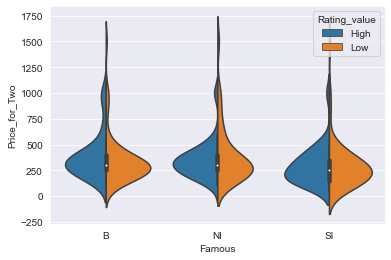

In [192]:
sns.violinplot(x = 'Famous',y = 'Price_for_Two',data = df,hue = "Rating_value",split = True)

In [152]:
df.head()

,RestaurantName,FoodTypes,Rating,Price_for_Two,Famous,Duration,Location,Rating_count,Resto_links,Rating_value
0,Mehfil,"Biryani, Chinese, Kebabs",3.9,250.0,B,33.0,Madhapur,5000.0,/restaurants/mehfil-jaihind-enclave-madhapur-h...,High
1,Vasista Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,350.0,B,30.0,Kondapur,1000.0,/restaurants/vasista-sri-lakshmi-main-road-kon...,High
2,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,350.0,B,41.0,Gachibowli,5000.0,/restaurants/shah-ghouse-hotel-and-restaurant-...,High
3,Hitech Bawarchi,"Biryani, Hyderabadi, North Indian, Tandoor, Mu...",3.7,250.0,B,35.0,Gachibowli,1000.0,/restaurants/hitech-bawarchi-indiranagar-gachi...,High
4,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,300.0,B,32.0,Kondapur,5000.0,/restaurants/shah-ghouse-hotel-kothaguda-x-roa...,High


<AxesSubplot:xlabel='Rating_value', ylabel='count'>

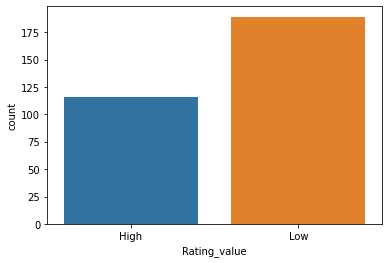

In [158]:
sns.countplot(df['Rating_value'])

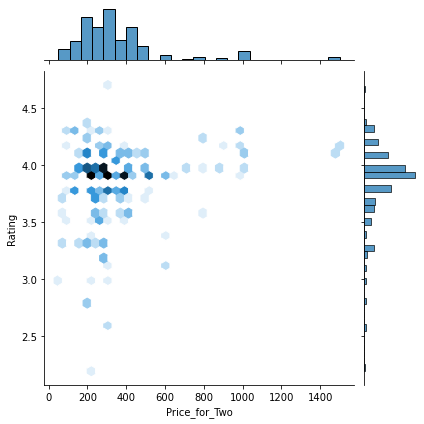

In [167]:
sns.jointplot(x='Price_for_Two' , y ='Rating' ,data=df,kind = "hex")

<AxesSubplot:xlabel='Famous', ylabel='Duration'>

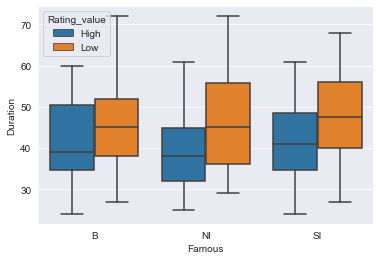

In [184]:
sns.boxplot(x = "Famous", y = "Duration", data = df,hue = "Rating_value")

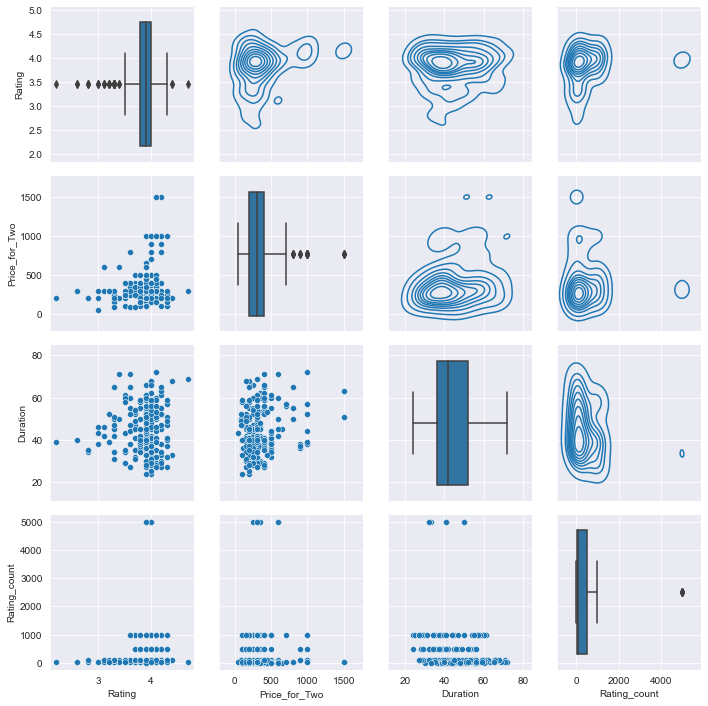

In [179]:
sns.set_style("darkgrid")
g= sns.PairGrid(df)
g.map_diag(sns.boxplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

<AxesSubplot:xlabel='Famous', ylabel='Rating'>

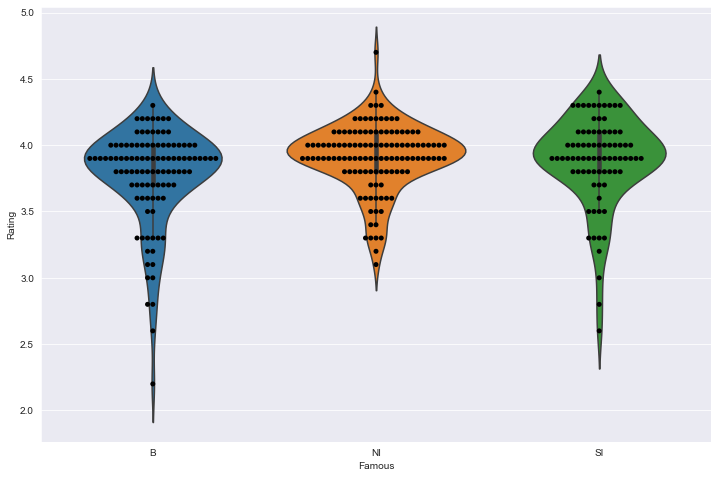

In [338]:
plt.figure(figsize = (12,8))
sns.violinplot(df["Famous"],df["Rating"])
sns.swarmplot(df["Famous"],df["Rating"],color = "black")

Most of the rating lie between 3.8 and 4. NorthIndian has less variations when compared to Biryani and SouthIndian

In [214]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Price Values')

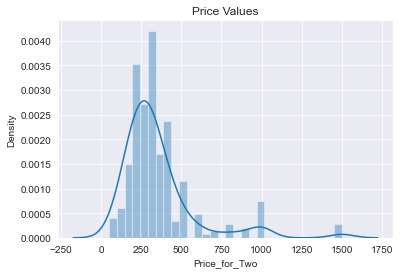

In [347]:
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.distplot(df['Price_for_Two'],bins = 30)
plt.title("Price Values")

 Average Price value ranges between 200 and 400

<AxesSubplot:xlabel='Duration'>

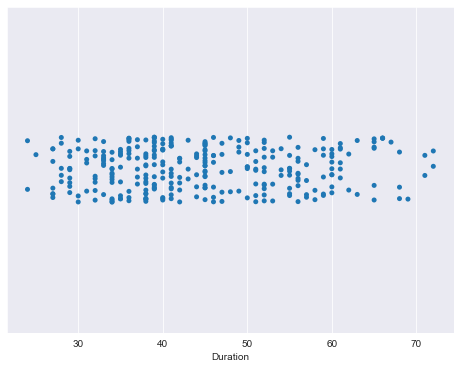

In [326]:
plt.figure(figsize= (8,6))
sns.stripplot(df["Duration"],jitter = True)

Average Delivery time is in between 35 to 45 mins

<AxesSubplot:xlabel='Price_for_Two', ylabel='Rating'>

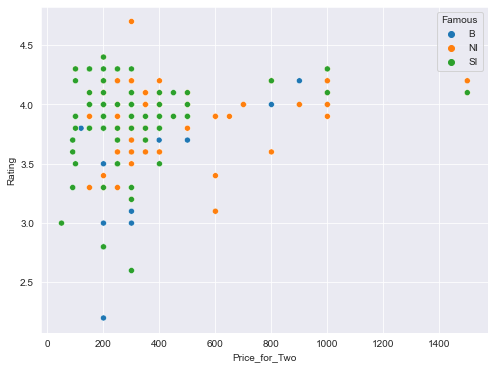

In [336]:
plt.figure(figsize= (8,6))
sns.scatterplot(x='Price_for_Two' , y ='Rating' ,data=df,hue = "Famous")

SI have different price values with different Rating when compared to Biryani and NI

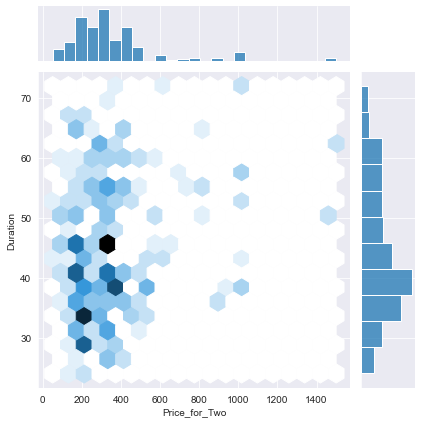

In [337]:
sns.jointplot(x ="Price_for_Two",y = "Duration",data = df,kind = "hex")

The colour density is more at Price values ranging between 200 & 400 and Delivery time between 35 & 45

In [ ]:
types = []
for i in df['FoodTypes']:
    if len(i)>1:
        j = i.split(",")
        for s in j:
            types.append(s.strip())

dj = pd.DataFrame({'Types': types})

<AxesSubplot:ylabel='Types'>

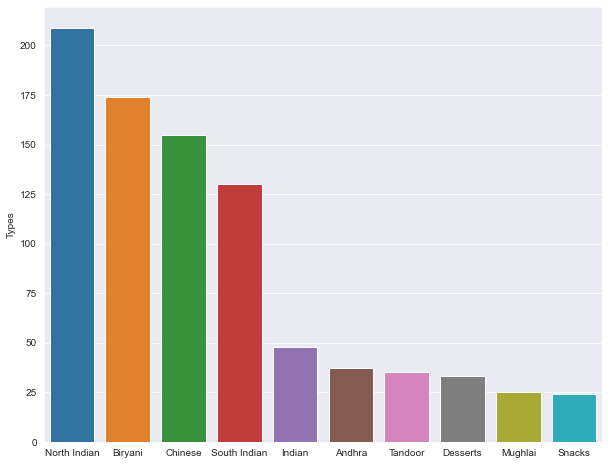

In [277]:
plt.figure(figsize=(10,8))
top_cuisines = dj["Types"].value_counts()[:10]
sns.barplot(top_cuisines.index,top_cuisines)

North Indian is the Highest served Foodtype in Restaurants followed by Biryani and chinese

<AxesSubplot:xlabel='Famous', ylabel='Duration'>

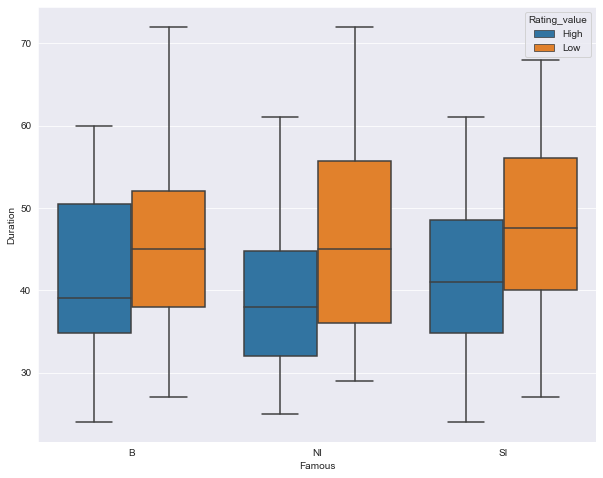

In [228]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "Famous", y = "Duration", data = df,hue = "Rating_value")

Restaurants having more user Rating count are taking less time to Deliver their food 

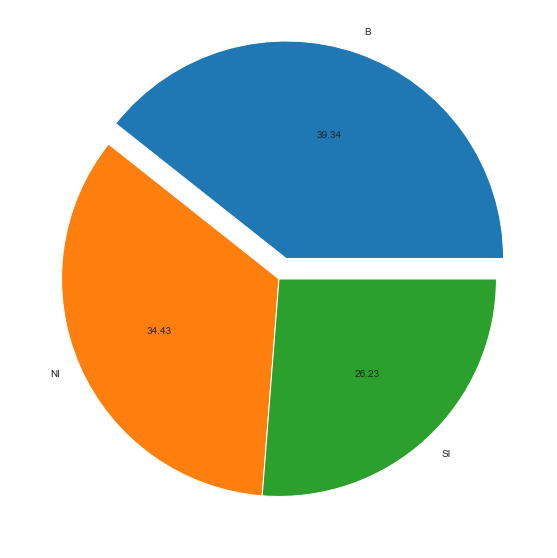

In [346]:
plt.figure(figsize=(12,10))
sizes = df["Famous"].value_counts()
labels = df["Famous"].unique()

plt.pie(sizes, labels = labels, explode = (0.1,0,0), autopct = "%.2f")
plt.show()


In Hyderabad most of the restaurants are popular for serving Biryani

<AxesSubplot:xlabel='count', ylabel='Location'>

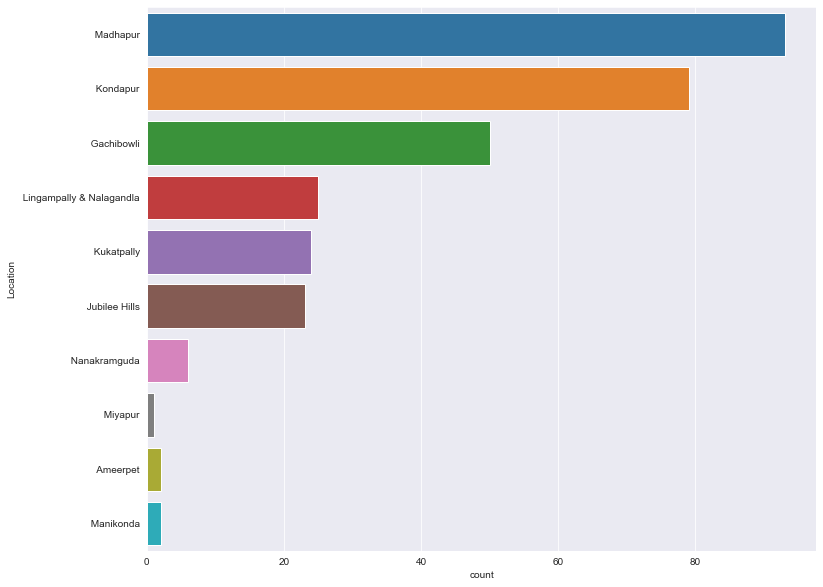

In [276]:
plt.figure(figsize=(12,10))
sns.countplot( y ="Location",data=df)

Madhapur have more number of Restaurants followed by Kondapur and Gachibowli 

<AxesSubplot:xlabel='Location'>

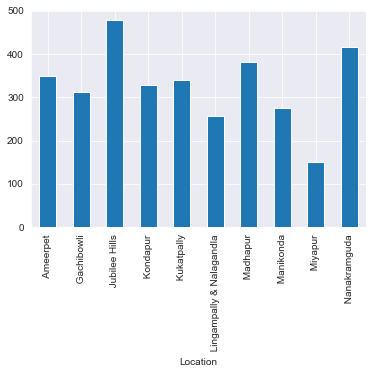

In [281]:
df.groupby('Location').mean()['Price_for_Two'].plot(kind='bar')

Jubliee Hills is having Expensive Restaurants in hyderabad

<AxesSubplot:xlabel='Famous'>

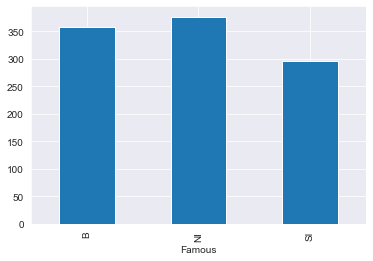

In [283]:
df.groupby('Famous').mean()["Price_for_Two"].plot(kind='bar')

Price values of North Indian are higher than Biryani and South Indian

In [285]:
df1 = df[df["Famous"].str.contains("B")]
df2 = df[df["Famous"].str.contains("NI")]
df3 = df[df["Famous"].str.contains("SI")]
top_Bir_Price = df1.sort_values("Price_for_Two",ascending = False)[:10]
top_NI_Price = df2.sort_values("Price_for_Two",ascending = False)[:10]
top_SI_Price = df3.sort_values("Price_for_Two",ascending = False)[:10]

Text(0.5, 1.0, 'SouthIndian')

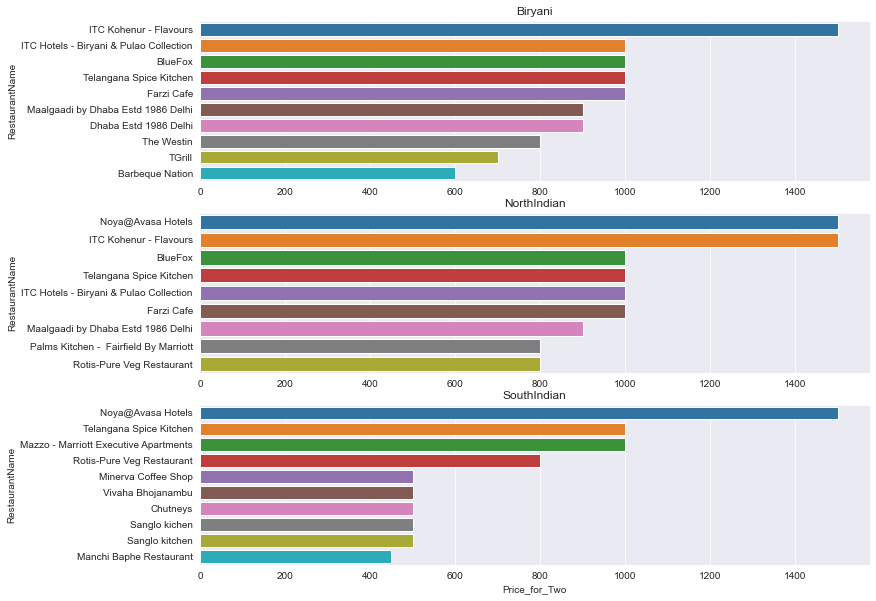

In [339]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.barplot("Price_for_Two","RestaurantName",data =top_Bir_Price)
plt.xlabel(" ")
plt.title("Biryani")
plt.subplot(3,1,2)
sns.barplot("Price_for_Two","RestaurantName",data =top_NI_Price)
plt.xlabel(" ")
plt.title("NorthIndian")
plt.subplot(3,1,3)
sns.barplot("Price_for_Two","RestaurantName",data =top_SI_Price)
plt.title("SouthIndian")

These are the top 10 restaurants of each of the famous food types

<AxesSubplot:>

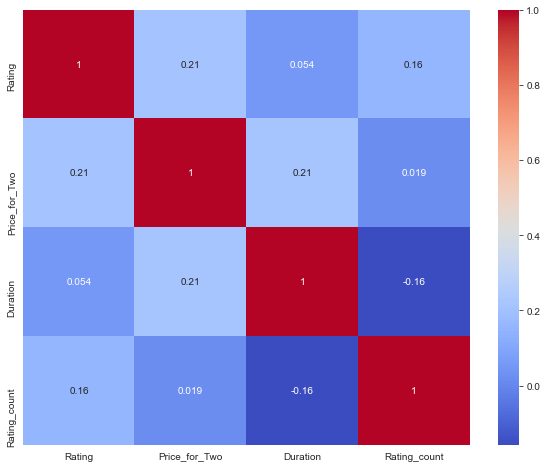

In [298]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap = "coolwarm")

There is very less correlation between them

<AxesSubplot:xlabel='Famous', ylabel='Location'>

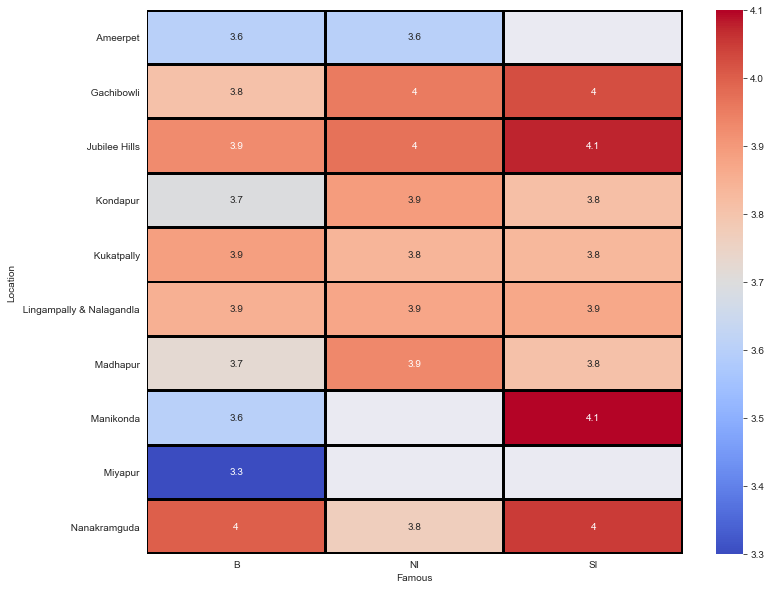

In [310]:
plt.figure(figsize=(12,10))
pt =df.pivot_table(values = "Rating" ,index = "Location" , columns = "Famous")
sns.heatmap(pt,annot = True,cmap = "coolwarm",linewidth = 2,linecolor = "black")

Jubilee Hills, Madhapur and Nanakramguda are having restaurants with high rating
Miyapur and Ameerpet are having restaurants with low rating


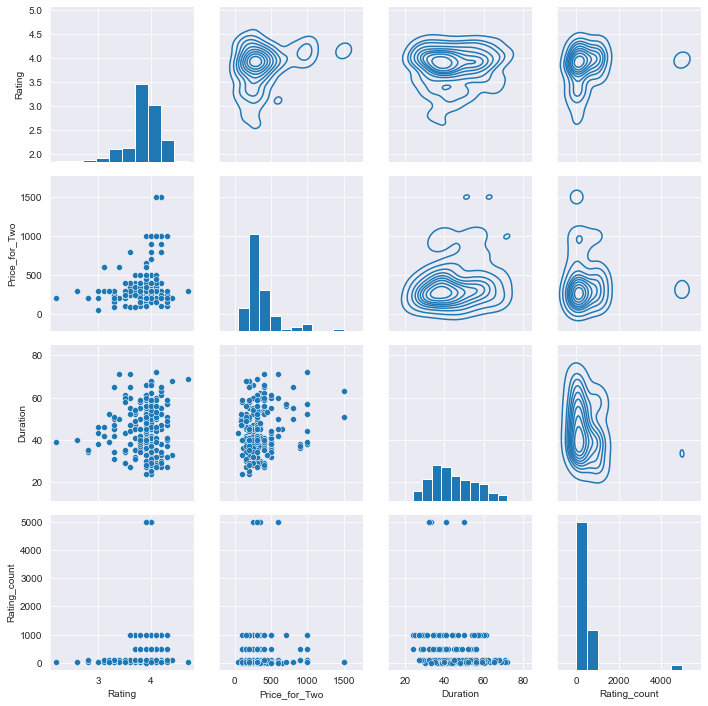

In [295]:
sns.set_style("darkgrid")
g= sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)